# JC3503 Assignment - Apartments

---

Student Name:   Yueju Han

Student Email:    u11yh21@abdn.ac.uk

Student ID:      50079687

---

Additional information about the dataset: https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

In [24]:
# Add any pre-requisites or libraries here
import pandas as pd
import seaborn as sns
import sklearn as sk


# Import the data
df = pd.read_csv("apartments.csv", low_memory=False)
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


### EDA and data cleaning
In this section, I would perform several explorative data analysis to familiarize with the dataset. After this, I would clean the dataset by filling or dropping the missing values, handling the outliers and 

In the following cell, I check the value of the attributes. 

The shape of the dataset is 99492 * 22. The data structure of attributes in the dataset vary a lot.

By examining the output, it is clear that `amenities`, `bathrooms`,`bedrooms`, `pets_allowed`, `address`, `city name`, `state`, `latitude` and `longitude` are containing NaN values. What's more, attributes `pets_allowed` and `address` seem to have quite amount of empty values which have a great impact on the data mining process.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

To have a overview of the numerical data, I calculate the mean, median and std according to each attributes.

Id: it makes no sense to do this with id attributes. :\)

bathrooms: however the max value is likely to be an outlier

bedrooms: containing missing values, again , the max value is seem to be outlier

price: may contain outliers ( need to seperate the monthly and weekly payment)

square_feet: highley possible has outliers.

In [26]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.949200e+04,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000,9.949200e+04
mean,5.358321e+09,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656,1.559665e+09
std,1.847404e+08,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168,1.105077e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197950e+09,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,5.508673e+09,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300,1.568745e+09
75%,5.509007e+09,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


Now I begin to clean the dataset. First I check the duplication of the rows

In [53]:
print(df.duplicated().sum(), df['id'].duplicated().sum())

84 84


In [55]:
df.drop_duplicates(inplace=True)              # just drop the duplicated rows
df.shape                                      # check the final amount of instances

(99408, 22)

Handle the Object data first!


In [60]:
df['category'].value_counts()            # get to know the values of category field

housing/rent/apartment            99347
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
Name: category, dtype: int64

In [70]:
# convert the category into ordinal data
# this would help the process of dateset when apply regression or classification model
df['category'].unique()
category_to_ordinal = {
    'housing/rent/apartment' : 1,
    'housing/rent/commercial/retail' : 2,
    'housing/rent' : 3,
    'housing/rent/home' : 4,
    'housing/rent/short_term' : 5,
    'housing/rent/condo' : 6,
    'housing/rent/other' : 7,
}
df["category_encoded"] = df['category'].map(category_to_ordinal)
df["category_encoded"].value_counts()

1    99347
2       42
3        7
4        4
5        4
6        3
7        1
Name: category_encoded, dtype: int64

In [76]:
# drop the title and body field for now, because text mining could separate from the conventional data mining process
df_title_body = df
df = df.drop(['title','body'],axis=1)
df.shape

(99408, 21)

In [82]:
print(df.amenities.isnull().sum())
df['amenities'].value_counts()

16034


Parking                                                                                                    6180
Parking,Storage                                                                                            2115
Gym,Pool                                                                                                   1870
Pool                                                                                                       1484
Gym,Parking,Pool                                                                                           1180
                                                                                                           ... 
Clubhouse,Gym,Patio/Deck,Pool,Storage,Tennis                                                                  1
Elevator,Gated,Parking,Wood Floors                                                                            1
AC,Cable or Satellite,Dishwasher,Fireplace,Garbage Disposal,Patio/Deck,Refrigerator,Tennis,Washer Dryer 

In [103]:
# for the amenities attribute, I convert it into interval data. 
# In detail, NaN value is 0. The others is the number of the amenities the apartment provides
df["amenities_num"] = 0
for i,rows in df.iterrows():
    if pd.notna(rows.amenities):
        amenity = rows.amenities.split(',')
        df.at[i,'amenities_num'] = len(amenity)

In [104]:
df["amenities_num"].value_counts()

0     16034
3     14521
2     14210
1     13395
4     10660
5      7593
6      5691
7      4527
8      3166
9      2397
10     2062
11     1571
12     1351
13      913
14      643
15      414
16      192
17       56
18       12
Name: amenities_num, dtype: int64

In [110]:
# check both currency and fee
print(df.currency.value_counts(),'\n',df.fee.value_counts())

USD    99408
Name: currency, dtype: int64 
 No     99207
Yes      201
Name: fee, dtype: int64


In [111]:
# So there is no need to change currency as they are all the same
# encode fee, 0 for No and 1 for Yes
fee_to_binary = {'No':0,"Yes":1}
df["fee_binary"] = df["fee"].map(fee_to_binary)
df["fee_binary"].value_counts()

0    99207
1      201
Name: fee_binary, dtype: int64

In [114]:
# has_photo field
print(df.has_photo.isnull().sum())
df.has_photo.value_counts()

0


Yes          55908
Thumbnail    34302
No            9198
Name: has_photo, dtype: int64

In [115]:
# also convert this field into ordianl data
photo_to_ordinal = {"No":0,"Yes":1,"Thumbnail":2}
df["photo"] = df["has_photo"].map(photo_to_ordinal)

In [116]:
# pets_allowed field
df["pets_allowed"].value_counts()

Cats,Dogs         37066
Cats               1840
Dogs                127
Cats,Dogs,None        1
Name: pets_allowed, dtype: int64

In [123]:
# in this case, i create two separate colums for cat and dog
df['Cats'] = 0
df['Dogs'] = 0
for i, row in df.iterrows():
    if pd.notna(row.pets_allowed):
        pets = row.pets_allowed.split(",")
        if len(pets) == 3:
            pets.remove('None')
        for p in pets:
            df.at[i,p] = 1


In [125]:
df['Dogs'].value_counts()

0    62214
1    37194
Name: Dogs, dtype: int64

In [131]:
# df.loc[:,['address','cityname','state','latitude','longitude']].head()
df["address"].isnull().sum(), df['cityname'].isnull().sum(), df['state'].isnull().sum()

(91466, 302, 302)

In [ ]:
# the address attribute has too much missing data, and can be discard since the location can be determined by other attributes
df = df.drop('address',axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99408 entries, 0 to 99491
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                99408 non-null  int64  
 1   category          99408 non-null  object 
 2   amenities         83374 non-null  object 
 3   bathrooms         99408 non-null  float64
 4   bedrooms          99284 non-null  float64
 5   currency          99408 non-null  object 
 6   fee               99408 non-null  object 
 7   has_photo         99408 non-null  object 
 8   pets_allowed      39034 non-null  object 
 9   price             99407 non-null  float64
 10  price_display     99407 non-null  object 
 11  price_type        99408 non-null  object 
 12  square_feet       99408 non-null  int64  
 13  cityname          99106 non-null  object 
 14  state             99106 non-null  object 
 15  latitude          99383 non-null  float64
 16  longitude         99383 non-null  float6

Handle the numerical data first!

For bathroom attributes, I first fill in the missing value with the mean. And then check all possible value of bathrooms, finding that it is wrong to have non-integer bathrooms. In addition, box plot shows that there are multiple outliers.

1.000000    56303
2.000000    36570
1.500000     3175
2.500000     2081
3.000000      890
3.500000      208
4.000000      120
1.445323       63
4.500000       42
5.000000       20
6.000000        8
5.500000        4
7.000000        3
8.000000        2
8.500000        1
9.000000        1
7.500000        1
Name: bathrooms, dtype: int64

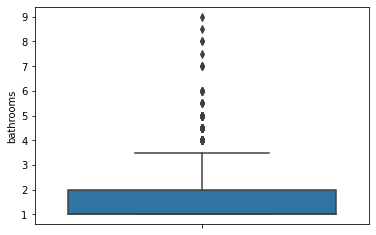

In [37]:
# checking the bathrooms
df['bathrooms'].fillna(df['bathrooms'].mean(),inplace=True)
# df['bathrooms'].info()
sns.boxplot(data=df,y='bathrooms')                  # show the outliers
df['bathrooms'].value_counts()

<AxesSubplot:xlabel='category'>

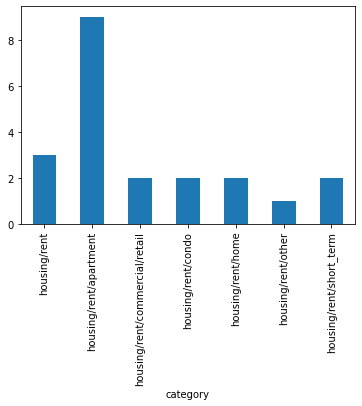

In [49]:
# further check whether the outlier is related to the category of apartments
df.groupby("category")['bathrooms'].max().plot(kind="bar")

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'price'

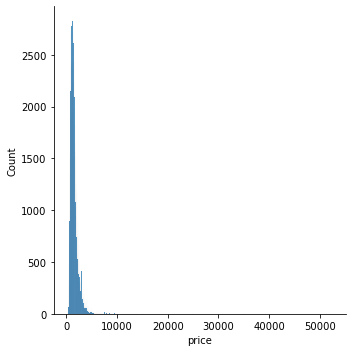

In [12]:
sns.displot(df,x='price')
sns.barplot(df, x="category", y="price", estimator="mean")